In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# not using MANOVA anymore
# from statsmodels.multivariate.manova import MANOVA
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

In [80]:
df = pd.read_csv('./data/NT_trials_full_table.csv')
# df = pd.read_csv('./data/NT_trials_split_up_WordNet_pairs.csv')
df

,subjID,prime,target,RT,accuracy,Path Similarity,Wu-Palmer Similarity,Leacock-Chodorow Similarity,Resnik Similarity,Jiang-Conrath Similarity,Lin Similarity,reuters,brown,gutenberg,webtext,weighted_avg
0,1,last,chance,435.0,1.0,0.333333,0.500000,2.159484,0.000000,0.070269,0.000000,0.000666,0.0,0.000766,0.01,0.000972
1,1,spinach,cats,447.0,1.0,0.100000,0.571429,1.335001,2.224150,0.052459,0.189204,NaN,0.0,0.000000,0.00,0.000000
2,1,mortgage,rent,479.0,1.0,0.166667,0.285714,1.466337,0.000000,0.057465,0.000000,0.000000,0.0,0.000000,NaN,0.000000
3,1,mall,shop,412.0,1.0,0.333333,0.900000,2.538974,7.483665,0.442635,0.868853,0.000000,0.0,0.000000,0.00,0.000000
4,1,palm,take,387.0,1.0,0.250000,0.400000,1.871802,0.000000,0.078436,0.000000,0.000000,0.0,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413559,319,conflict,tennis,525.0,1.0,0.125000,0.588235,1.558145,2.332238,0.069923,0.245941,0.000000,0.0,0.000000,0.00,0.000000
413560,319,impatience,patient,461.0,1.0,0.100000,0.181818,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,NaN,0.000000
413561,319,neutron,atom,464.0,1.0,0.076923,0.250000,1.072637,0.801759,0.044613,0.066762,NaN,0.0,NaN,NaN,0.000000
413562,319,unsure,maybe,438.0,1.0,0.333333,0.500000,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0.000000


In [28]:
def count_unique_rows(df, *cols: str):
    return df[list(cols)].groupby(list(cols), as_index=False).value_counts()

In [29]:
count_unique_rows(df, "Path Similarity")

,Path Similarity,count
0,0.045455,65
1,0.047619,245
2,0.050000,246
3,0.052632,425
4,0.055556,722
5,0.058824,1756
6,0.062500,1926
7,0.066667,4037
8,0.071429,4482
9,0.076923,9989


In [47]:
count_unique_rows(df, "subjID")

,subjID,count
0,1,1650
1,2,1659
2,3,1650
3,4,1642
4,5,1648
...,...,...
252,253,1025
253,254,1651
254,255,1648
255,256,1659


In [83]:
def plot_distribution(names, n=3):
    num_plots = len(names)
    num_rows = int(np.ceil(num_plots / n))
    fig, axs = plt.subplots(num_rows, n, figsize=(15, 5*num_rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, name in enumerate(names):
        rating_name = name
        group_info = count_unique_rows(df, rating_name)
        x = group_info[rating_name]
        y = group_info["count"]

        min_val = np.min(x)
        max_val = np.max(x)
        mean_val = np.mean(x)
        std_val = np.std(x)

        row = i // n
        col = i % n

        axs[row, col].scatter(x, y, edgecolors='black', alpha=0.2)

        axs[row, col].axvline(min_val, color='r', linestyle='--', label='Min')
        axs[row, col].axvline(max_val, color='g', linestyle='--', label='Max')
        axs[row, col].axvline(mean_val, color='b',
                              linestyle='--', label='Mean')
        axs[row, col].axvline(mean_val - std_val, color='b',
                              linestyle=':', label='-Std')
        axs[row, col].axvline(mean_val + std_val, color='b',
                              linestyle=':', label='+Std')

        axs[row, col].set_title(f'{rating_name} Scores Distribution')
        axs[row, col].set_xlabel('Score Value')
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].legend()

    for i in range(num_plots, num_rows*n):
        row = i // n
        col = i % n
        fig.delaxes(axs[row, col])

    plt.show()


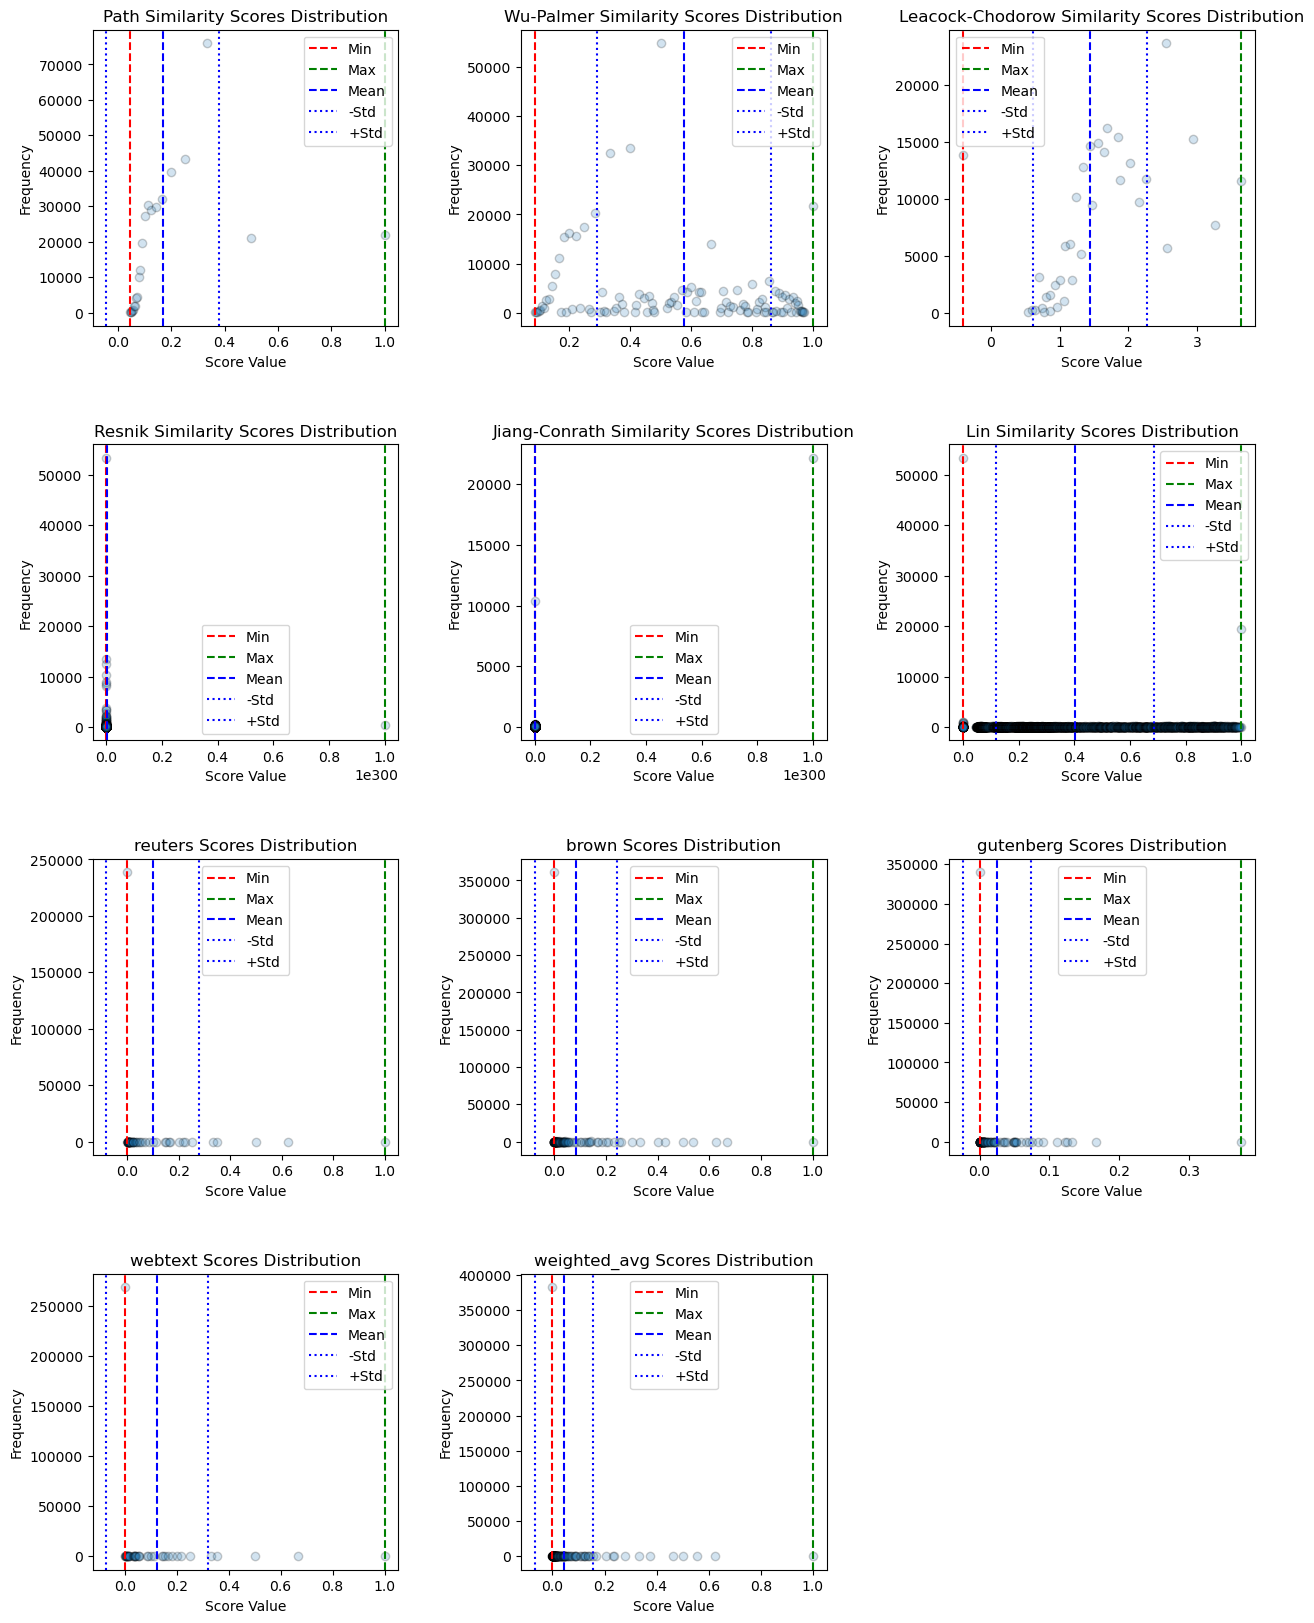

In [84]:
plot_distribution(list(df.loc[:,"Path Similarity":].columns))

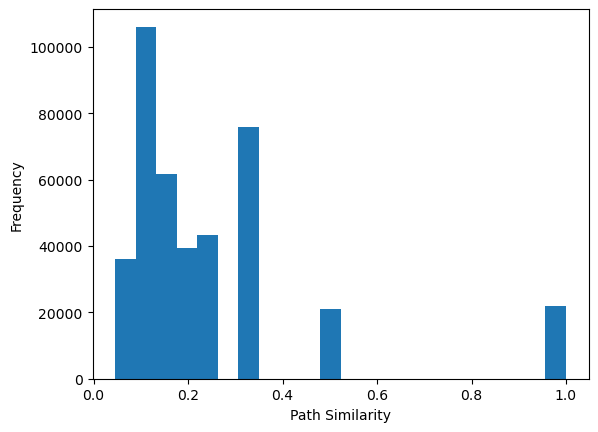

In [104]:
x = df['Path Similarity']
plt.hist(x, bins=len(count_unique_rows(df, "Path Similarity")))
plt.xlabel('Path Similarity')
plt.ylabel('Frequency')
plt.show()

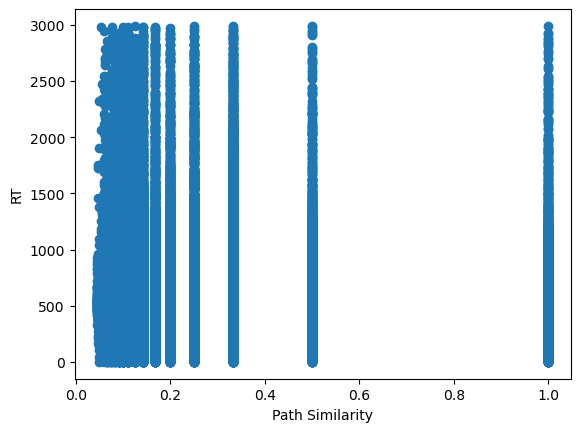

In [87]:
x = df['Path Similarity']
y = df['RT']

plt.scatter(x, y)
plt.xlabel('Path Similarity')
plt.ylabel('RT')
plt.show()


<Axes: >

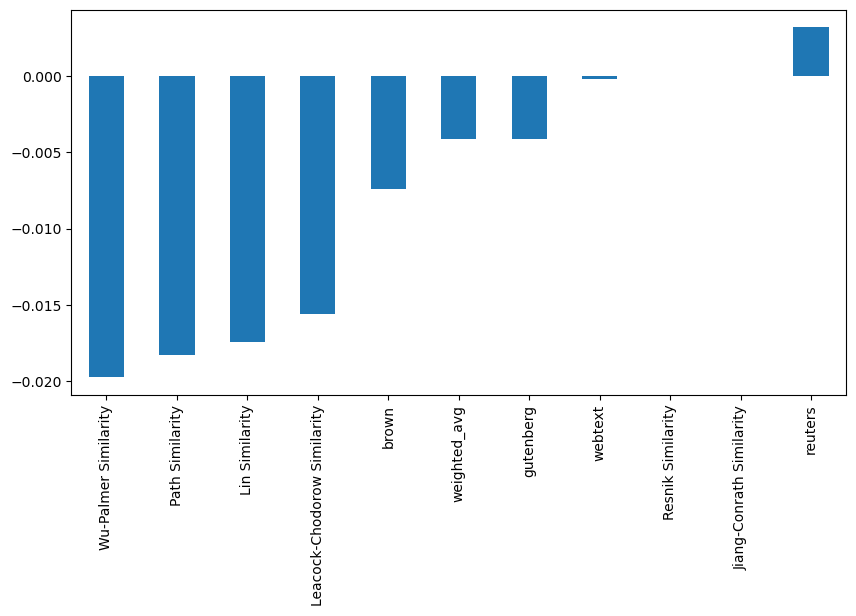

In [88]:
corr_with_target = df.loc[:,"Path Similarity":].corrwith(df['RT'])

corr_with_target.sort_values(inplace=True)
corr_with_target.plot(kind='bar', figsize=(10, 5))

In [89]:
valid_df = df[df['Path Similarity'].notna()].copy()
# valid_df["Path Similarity"] = valid_df["Path Similarity"].apply(lambda x: 1/x)

In [94]:
draw = valid_df[valid_df["subjID"]==2]
draw = draw.groupby("Path Similarity", as_index=False).agg("mean")[["RT", "Path Similarity"]]

/var/folders/f4/m919wlk552x3h333cpntnqjh0000gn/T/ipykernel_68973/1390079689.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  draw = draw.groupby("Path Similarity", as_index=False).agg("mean")[["RT", "Path Similarity"]]


corr: -0.19190516129756754


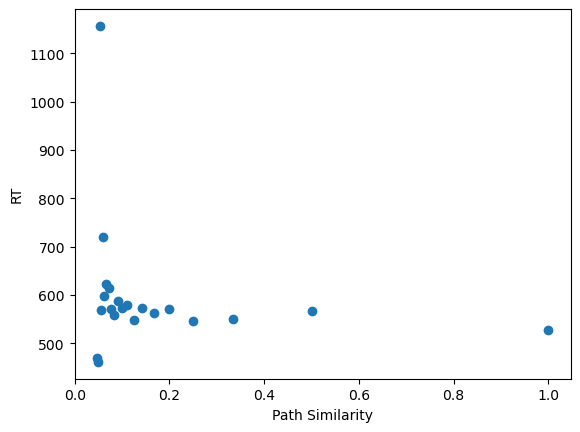

In [95]:
x = draw['Path Similarity']
y = draw['RT']

plt.scatter(x, y)
plt.xlabel('Path Similarity')
plt.ylabel('RT')

corr = np.corrcoef(x, y)[0, 1]
print("corr:", corr)

In [96]:
def filter_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

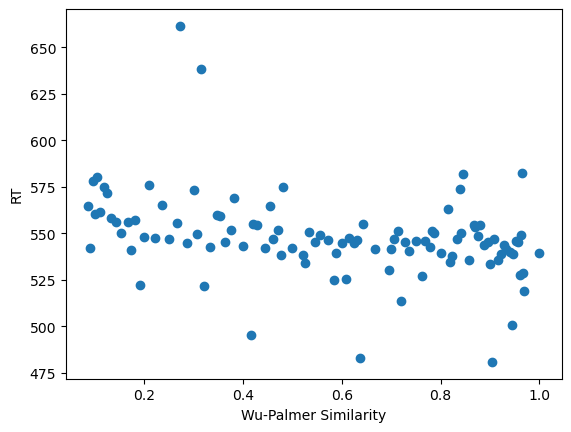

In [105]:
rating = "Wu-Palmer Similarity"
draw = filter_outliers(valid_df, rating)
draw = draw.groupby(rating)['RT'].agg(['mean', 'std'])

plt.scatter(draw.index, draw['mean'])
plt.xlabel('Wu-Palmer Similarity')
plt.ylabel('RT')
plt.show()

In [101]:
path_sim_stats = df.groupby('Path Similarity')['RT'].agg(['mean', 'median', 'max', 'min'])
path_sim_stats

,mean,median,max,min
Path Similarity,,,,
0.045455,564.676923,542.0,929.0,329.0
0.047619,541.424490,512.0,1757.0,165.0
0.050000,565.764228,531.5,2327.0,1.0
0.052632,568.590588,534.0,2984.0,5.0
0.055556,572.306094,534.5,2474.0,77.0
0.058824,571.375285,533.0,2945.0,3.0
0.062500,571.730530,534.0,2782.0,13.0
0.066667,563.854595,534.0,2858.0,1.0
0.071429,567.404953,527.0,2859.0,4.0


Text(0, 0.5, 'RT')

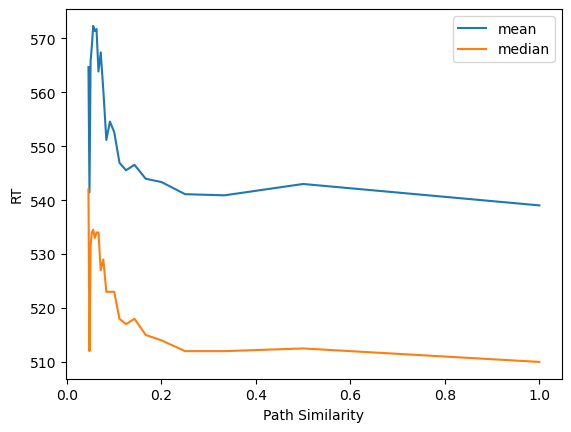

In [106]:
x = path_sim_stats.index
y = path_sim_stats.iloc[:, :-2]

plt.plot(x, y)

plt.legend(y.columns)
plt.xlabel('Path Similarity')
plt.ylabel('RT')